# CS904 Assignment 1

Welcome to my notebook. We will go through 2 tasks. From making Dot-plots,implementing the Needleman Wunsch algorithm for pairwise and multiple alignments to constructing phylogenetic trees for different species, aboard the train!


In [1]:
#Import all relevant libraries

from Bio import Entrez
import numpy as np
import os
import copy
import numpy
import matplotlib.pyplot as plt

In [2]:
#Get current wd

wdir= os.getcwd()

print(wdir)

/Users/panagiotissotirellos


In [3]:
#Function to Download whole Sequences from NCBI database

def whole_seq(seq_id):
    
    Entrez.email = "T.Bretschneider@warwick.ac.uk"
    handle = Entrez.efetch(db="nucleotide",
    id = seq_id,rettype="fasta", retmode="xml")
    record = Entrez.read(handle,"fasta")
    handle.close()
    record=record[0] #record is an array of dictionaries, get the first entry

    print(record['TSeq_sequence'])

These are the start and end positions by observation from the ORF tool, 
below there is also a function that can extract those given an ID,start and end position

Wuhan Sequence:

Start : 21536 

End   : 25384

Omicron Variant 

Start : 21488 

End : 25327

Hiroshima :

Start : 21511

End : 25353



In [4]:
#Function for data extraction for the entire Sequence and for Specific Range of Sequence [start and end position] 
#given sequence ID


def extraction(seq_id,start,end):
    Entrez.email = "T.Bretschneider@warwick.ac.uk"
    handle = Entrez.efetch(
        db="nucleotide",
        id=seq_id ,
        rettype="fasta",
        retmode="xml")
    record = Entrez.read(handle , "fasta")
    handle.close()
    record_sequence=record[0]['TSeq_sequence'][start-1:end]
    return record_sequence
    
 #Function for Specific Range of Sequence (Slicing)



    
    
    
    
    
    

In [5]:
#Check if function works

extraction('NC_045512.2',21536,25384)

'ATGTTCTTGTTAACAACTAAACGAACAATGTTTGTTTTTCTTGTTTTATTGCCACTAGTCTCTAGTCAGTGTGTTAATCTTACAACCAGAACTCAATTACCCCCTGCATACACTAATTCTTTCACACGTGGTGTTTATTACCCTGACAAAGTTTTCAGATCCTCAGTTTTACATTCAACTCAGGACTTGTTCTTACCTTTCTTTTCCAATGTTACTTGGTTCCATGCTATACATGTCTCTGGGACCAATGGTACTAAGAGGTTTGATAACCCTGTCCTACCATTTAATGATGGTGTTTATTTTGCTTCCACTGAGAAGTCTAACATAATAAGAGGCTGGATTTTTGGTACTACTTTAGATTCGAAGACCCAGTCCCTACTTATTGTTAATAACGCTACTAATGTTGTTATTAAAGTCTGTGAATTTCAATTTTGTAATGATCCATTTTTGGGTGTTTATTACCACAAAAACAACAAAAGTTGGATGGAAAGTGAGTTCAGAGTTTATTCTAGTGCGAATAATTGCACTTTTGAATATGTCTCTCAGCCTTTTCTTATGGACCTTGAAGGAAAACAGGGTAATTTCAAAAATCTTAGGGAATTTGTGTTTAAGAATATTGATGGTTATTTTAAAATATATTCTAAGCACACGCCTATTAATTTAGTGCGTGATCTCCCTCAGGGTTTTTCGGCTTTAGAACCATTGGTAGATTTGCCAATAGGTATTAACATCACTAGGTTTCAAACTTTACTTGCTTTACATAGAAGTTATTTGACTCCTGGTGATTCTTCTTCAGGTTGGACAGCTGGTGCTGCAGCTTATTATGTGGGTTATCTTCAACCTAGGACTTTTCTATTAAAATATAATGAAAATGGAACCATTACAGATGCTGTAGACTGTGCACTTGACCCTCTCTCAGAAACAAAGTGTACGTTGAAATCCTTCACTGTAGAAAAAGGAATCTATCAAACTTCTAACTTTAGAGTCCAACCAACAGAA

In [6]:
#length is correct (according to assignment specification)

len(extraction('NC_045512.2',21536,25384))

3849

2) Make **Dot-plots** of region considering the receptor-binding domain (RDB) Note that the plots will be noisy so a function for **smoothing** has been generated

In [7]:
#Make all possible dot-plots of pairwise alignments of the 3 sequence genomes: (3 plots) 

#slice the sequences in range  1374 to 1449 which is asked

wuhan_1=extraction('NC_045512.2',21536,25384)
Omicron_2=extraction('OM095411.1',21488,25327)
Hiroshima_3=extraction('NC_045512.2',21511,25353)

#Here are the sliced Sequences which will be used for the dot-plots
start_idx = 1374
end_idx =1449
sliced_wuhan=wuhan_1[start_idx - 1:end_idx]
sliced_Omicron=Omicron_2[start_idx - 1:end_idx]
sliced_Hiroshima=Hiroshima_3[start_idx - 1:end_idx]

In [8]:

#Dot plot Window Smoothing
def smoothing(seqx, seqy, W):
    #round the window division down in order for the element examined to be always in the middle of window
    rw = W // 2
    #M refers to matches and bibliography notes that is should be larger than window
    M = rw + 1
    #compare the original matrix and create a new matrix to apply changes
    original_matrix = numpy.array(makeMatrix(seqx, seqy))
    new_matrix = numpy.ones_like(original_matrix)

    for x in range(new_matrix.shape[0]):
        for y in range(new_matrix.shape[1]):
            if original_matrix[x, y] == 1:
                continue
            counter = 0
            # we have accessed center points and now we need to look at the "window"
            for ri in range(-rw, rw + 1):
                i = ri + x
                j = ri + y
                if not (0 <= i < len(seqx) and (0 <= j < len(seqy))):
                    continue
                if original_matrix[i, j] == 0:
                    counter += 1
            if counter >= M:
                new_matrix[x, y] = 0

    return new_matrix


In [9]:
#Generate matrix for Dot-plots

def delta(x,y):
    return 0 if x == y else 1

def makeMatrix(seq1,seq2):
    
    print(seq1, seq2)
    return [[delta(i,j) for i in seq1] for j in seq2]

TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
15
TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAG
15
TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAG
TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAG GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
15
TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAG GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC


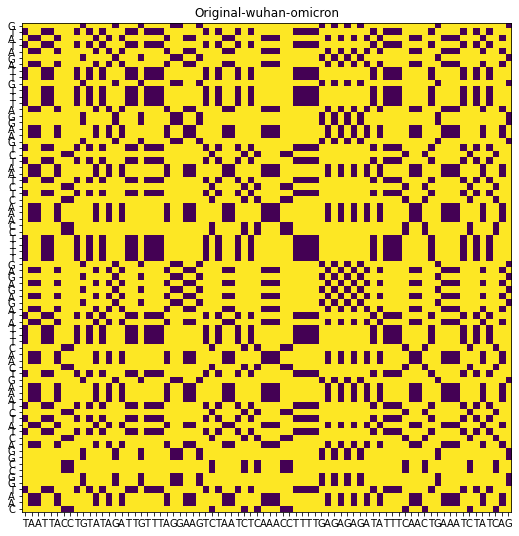

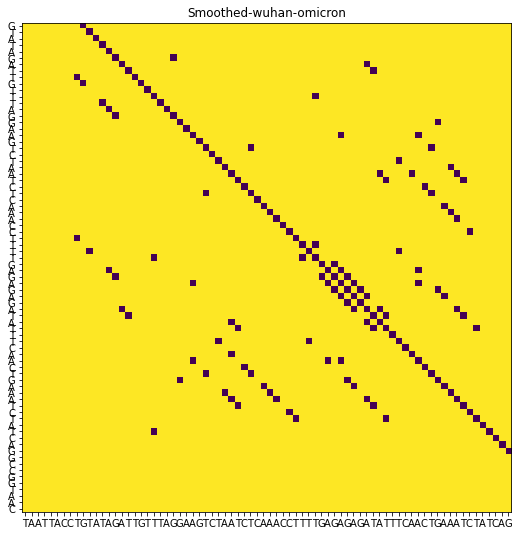

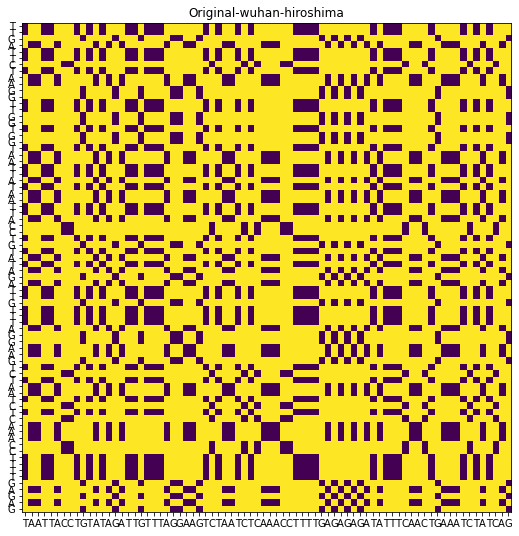

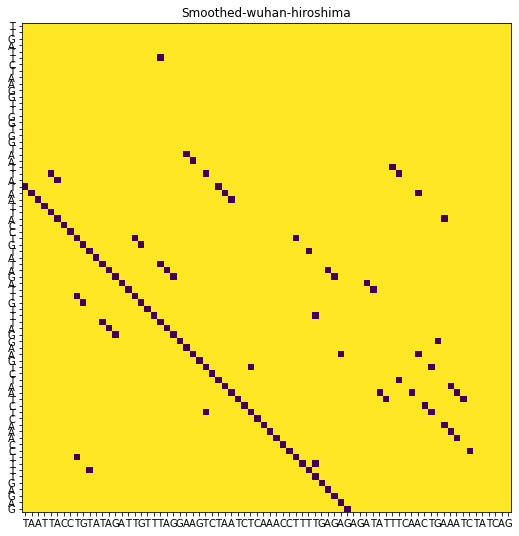

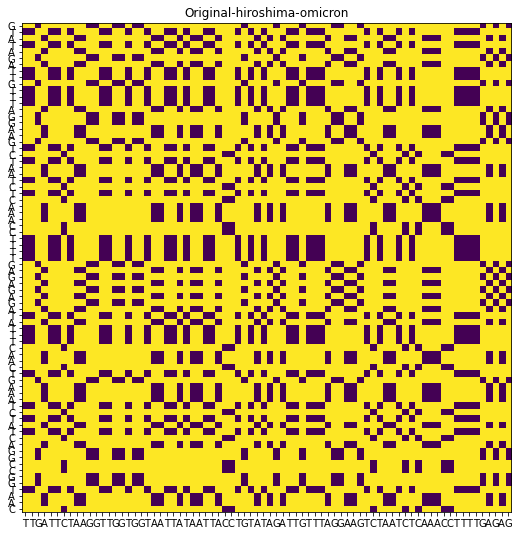

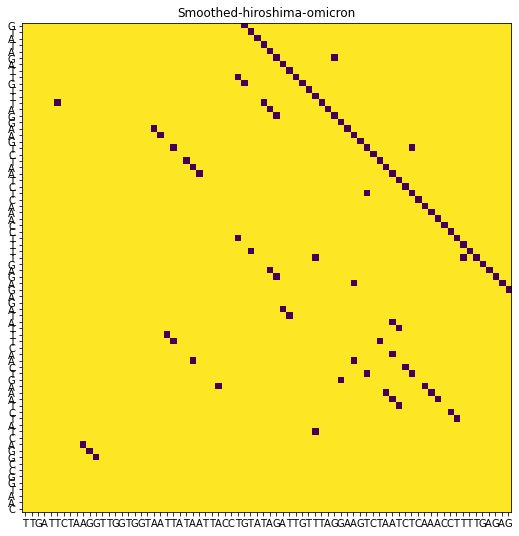

In [10]:
#Create function that will plot the 3 dot-plots and their smoothed versions 

def plot_dot_plot(seqx, seqy, prefix: str):
    matrix = numpy.array(makeMatrix(seqx, seqy))
    plt.figure()
    dotplot = plt.imshow(matrix)
    xt = plt.xticks(numpy.arange(len(list(seqx))), list(seqx))
    yt = plt.yticks(numpy.arange(len(list(seqy))), list(seqy))
    plt.title("Original-{}".format(prefix))
    plt.figure()
    length_diagonal = max((end_idx - start_idx + 1) // 5, 11)
    if length_diagonal % 2 == 0:
        length_diagonal += 1
    print(length_diagonal)
    dotplot = plt.imshow(smoothing(seqx, seqy, length_diagonal))
    xt = plt.xticks(numpy.arange(len(list(seqx))), list(seqx))
    yt = plt.yticks(numpy.arange(len(list(seqy))), list(seqy))
    plt.title("Smoothed-{}".format(prefix))
    # plt.show()


plt.rcParams['figure.figsize'] = [24, 9]

plot_dot_plot(sliced_wuhan, sliced_Omicron, "wuhan-omicron")
plot_dot_plot(sliced_wuhan, sliced_Hiroshima, "wuhan-hiroshima")
plot_dot_plot(sliced_Hiroshima, sliced_Omicron, "hiroshima-omicron")
plt.show()


In [11]:
sliced_Omicron

'GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC'

In [12]:
sliced_Hiroshima

'TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAG'

# Question 3:

Compute the corresponding Needleman-Wunsch scores for that region (nucleotides 1374 to 1449 of the S-protein). Use a scoring function where a
match scores +1, a mismatch or an insertion or deletion −1

In [13]:
# write the NW algorithm  create the 2 matrices one for the scores and one for the backtracking


# sequences to be alligned :


In [14]:
#Function for Needleman Wunch algorithm Implementation

#Create a scoring scheme function and call it later inside the NWA function:
#options are when the pairwise elements coincide (1=match) when there is a - character in any of the 2 (gap=0)
#or when the elements dont coincide (missmatch=-1)

def pairwise_scoring_function(char1, char2, match=1, mismatch=-1, gap=0):
    if char1 == char2:
        score = match
    else:
        if char1 == '-' or char2 =='-':
            score = gap    
        else:
            score = mismatch
    return score


def NWA(seq_1, seq_2) :
    
#initialise empty matrices one for scores and 2 for backtracking purposes:
    f_matrix = np.zeros([len(seq_1) + 1, len(seq_2) + 1], dtype=int)
    create_backtrack_matrix = np.zeros([len(seq_1) + 1, len(seq_2) + 1], dtype = int)
    backtrack_matrix = np.full([len(seq_1) + 2, len(seq_2) + 2], "")
    #Label axis according to sequences examined
    backtrack_matrix[2:, 0] = list(seq_1)
    backtrack_matrix[0, 2:] = list(seq_2)


    #Scoring Scheme :

    match = 1
    missmatch = -1
    gap = 0

    #Step 1 : Initilisation

    for row in range(len(seq_1) + 1):
        f_matrix[row][0] = row * gap
    for col in range(len(seq_2) + 1):
        f_matrix[0][col] = col * gap
        
    #Step 2 fill the scores matrix according to  scoring rules:

    for row in range(1,len(seq_1) + 1):
        for col in range(1,len(seq_2) + 1):
            f_matrix[row][col] = max(
                f_matrix[row - 1][col - 1] + pairwise_scoring_function(seq_1[row-1], seq_2[col-1]),
                f_matrix[row - 1][col] + gap,
                f_matrix[row][col - 1] +  gap,
            )
    



    #Step 3 : Traceback Algo

    alignment_1 = ""
    alignment_2 = ""

    trace_row = len(seq_1) + 1
    trace_col = len(seq_2) + 1
    #if there are matches or missmatches we write them down as they are, if there are gaps we introduce "-"
    while (trace_row > 0 and trace_col > 0):
        if trace_row == 1 and trace_col == 1:
            break
        char_1 = seq_1[trace_row - 2] if trace_row > 1 else "-"
        char_2 = seq_2[trace_col - 2] if trace_col > 1 else "-"
        if (trace_row > 0 and trace_col > 0 and f_matrix[trace_row - 1][trace_col - 1] == f_matrix[trace_row - 2][trace_col - 2]
        + pairwise_scoring_function(char_1, char_2)):
            alignment_1 = char_1 + alignment_1
            alignment_2 = char_2 + alignment_2

            backtrack_matrix[trace_row][trace_col] = "↖"
            trace_row = trace_row - 1

        
            trace_col = trace_col - 1
        elif(trace_col > 0 and f_matrix[trace_row-1][trace_col-1] == f_matrix[trace_row - 1][trace_col-2] + gap):
            alignment_1 = "-" + alignment_1
            alignment_2 = char_2 + alignment_2
            #alignment_1 = seq_1[trace_row - 2] + alignment_1
            #alignment_2 = "-" + alignment_2
            
            backtrack_matrix[trace_row][trace_col] = "←"
            
            trace_col = trace_col - 1
        else:
            alignment_1 = char_1 + alignment_1
            alignment_2 = "-" + alignment_2

            
            backtrack_matrix[trace_row][trace_col] = "↑"

            trace_row = trace_row - 1
    
    # score, alignment, traceback
    return f_matrix[-1, -1], (alignment_1, alignment_2), backtrack_matrix, f_matrix
    
    

In [15]:
#Uncomment the below if you want to see the whole scoring matrix:
# np.set_printoptions(threshold=np.inf)
# np.set_printoptions(linewidth=100)



def print_backtrack_matrix(matrix):
    matrix = matrix.tolist()
    for row in matrix:
        row_str = ""
        for cell in row:
            if cell != "":
                row_str += cell
            else:
                row_str += " "
        print(row_str)



# print(sliced_Hiroshima)
# print(sliced_Omicron)
#sliced_Hiroshima = "TTGATT"
#sliced_Omicron = "GTATAG"
results = NWA(sliced_Hiroshima,sliced_Omicron), NWA(sliced_Hiroshima,sliced_wuhan),NWA(sliced_wuhan,sliced_Omicron)

for result in results:
    score, alignment, backtrack,matrix  = result
    # print metrics
    print(score)
    for a in alignment:
        print(a)
    print_backtrack_matrix(backtrack)
    print(matrix)



49
-T-T-GATTCTAAGGTTGGT-GGTAAT-TA-TAAT-T---ACCTGTATA-GATTGTTTAG-GA-AGTC-T-AATCTC-AAACCTT-T-TG-AGA----G----
GTATAGA-T-T---GTT--TAGG-AA-GT-CTAATCTCAAACCT-T-T-TGA--G---AGAGATA-T-TTCAA-CT-GAAA---TCTAT-CAG-GCCGGTAAC
  GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
  ↖                                                                           
T  ↖←                                                                         
T    ↖←                                                                       
G      ↖                                                                      
A       ↖                                                                     
T       ↑                                                                     
T        ↖                                                                    
C        ↑                                                                    
T         ↖                                                                   

# TASK 4 Extension to multiple alignments!


In [16]:
# this is for task 4 but cannot work it out

from typing import List
import itertools
def column_scoring_function(col_1: List, col_2: List, match=1, mismatch=-1):
    """
    Col1 and col2 may have different length, N and M respectfully. 
    Iterate over all the possible pairwise combinations of col1 and col2. N*M in total
    """
    score = 0
    for a, b in itertools.product(col_1, col_2):
        if a == b:
            score += match
        else:
            score += mismatch
    return score
#Function for Needleman Wunch algorithm Implementation

def NWA_align_of_align(alignment_1, alignment_2):
    """
    alignment_1 (N,D) string matrix, where N is the lenght of the sequences 
            and D is the number of the sequences in the alignment.
    """
    n1, d1 = alignment_1.shape
    n2, d2 = alignment_2.shape
    
    #initialise 2 matrices one for scores and one for backtracking purposes:
    f_matrix = np.zeros([n1 + 1, n2 + 1], dtype=int)
    backtrack_matrix = np.full([n1 + 1 + d2, n2 + 1 + d1], "")
    #Label axis according to sequences examined
    backtrack_matrix[(1 + d2):, :d1] = alignment_1
    backtrack_matrix[:d2, (1 + d1):] = np.transpose(alignment_2)


    #Scoring Scheme :

    match = 1
    missmatch = -1
    gap = 0

    #Fill backtrack matrix according to scores:

    #print(create_backtrack_matrix)

    #Fill up the NW (main) matrix now

    #Step 1 : Initilisation

    for row in range(n1 + 1):
        f_matrix[row][0] = row * gap
    for col in range(n2 + 1):
        f_matrix[0][col] = col * gap
        
    #Step 2 fill the matrix:

    for row in range(1, n1 + 1):
        for col in range(1, n2 + 1):
            col_score = column_scoring_function(alignment_1[row-1, :].tolist(), alignment_2[col-1, :].tolist())
            f_matrix[row][col] = max(
                f_matrix[row - 1][col - 1] + col_score,
                f_matrix[row - 1][col] + gap,
                f_matrix[row][col - 1] +  gap,
            )
    



    #Step 3 : Traceback Algo

    align_alignment_1 = []
    align_alignment_2 = []

    trace_row = n1 + d2
    trace_col = n2 + d1
    #if there are matches or missmatches we write them down as they are, if there are gaps we introduce "-"
    while (trace_row > d2 - 1 and trace_col > d1 - 1):
        if trace_row == d2 and trace_col == d1:
            break
        col_1 = alignment_1[trace_row - 1 - d2, :].tolist() if trace_row > d2 else ["-"] * d1
        col_2 = alignment_2[trace_col - 1 - d1, :].tolist() if trace_col > d1 else ["-"] * d2
        col_score = column_scoring_function(col_1, col_2)
        if (
            trace_row > d2 - 1 and trace_col > d1 - 1 and 
            f_matrix[trace_row - d2][trace_col - d1] == f_matrix[trace_row - d2 - 1][trace_col - d1 - 1] + col_score
        ):
            align_alignment_1.insert(0, col_1)
            align_alignment_2.insert(0, col_2)

            backtrack_matrix[trace_row][trace_col] = "↖"
            trace_row = trace_row - 1
            trace_col = trace_col - 1
        elif(trace_col > d1 - 1 and f_matrix[trace_row - d2][trace_col - d1] == f_matrix[trace_row - d2][trace_col-d1-1] + gap):
            align_alignment_1.insert(0, ["-"] * d1)
            align_alignment_2.insert(0, col_2)
            #alignment_1 = seq_1[trace_row - 2] + alignment_1
            #alignment_2 = "-" + alignment_2
            
            backtrack_matrix[trace_row][trace_col] = "←"
            
            trace_col = trace_col - 1
        else:
            align_alignment_1.insert(0, col_1)
            align_alignment_2.insert(0, ["-"] * d2)

            
            backtrack_matrix[trace_row][trace_col] = "↑"

            trace_row = trace_row - 1
    
    # score, alignment, traceback
    return f_matrix[-1, -1], (align_alignment_1, align_alignment_2), backtrack_matrix, f_matrix
      
    


In [17]:
#check if your extension works
def print_align_alignment(a_ali: List[List]):
    
    for i in range(len(a_ali[0])):
        output_str = ""
        for col in a_ali:
            output_str += col[i]
        print(output_str)

def print_backtrack_matrix(matrix):
    matrix = matrix.tolist()
    for row in matrix:
        row_str = ""
        for cell in row:
            if cell != "":
                row_str += cell
            else:
                row_str += " "
        print(row_str)
ali1= results[0][1]
ali2 = results[1][1]

#Make alignment 1 a vector column (transpose it) in order to compare it 
ali1 = numpy.array([list(a) for a in ali1], dtype=str)
ali1 = np.transpose(ali1)

#Make alignment 2 a vector column (transpose it) in order to compare it 
ali2 = numpy.array([list(a) for a in ali2], dtype=str)
ali2 = np.transpose(ali2)
ali1 = ali1
ali2 = ali2
print_align_alignment(ali1)
print_align_alignment(ali2)
print()
#test extension
f_score, align_alignments, backtrack, f_matrix = NWA_align_of_align(ali1, ali2)
for a in align_alignments:
    print_align_alignment(a)
    print("".join(["="]*len(a)))
print()
print_backtrack_matrix(backtrack)
print()
print(f_matrix)

-T-T-GATTCTAAGGTTGGT-GGTAAT-TA-TAAT-T---ACCTGTATA-GATTGTTTAG-GA-AGTC-T-AATCTC-AAACCTT-T-TG-AGA----G----
GTATAGA-T-T---GTT--TAGG-AA-GT-CTAATCTCAAACCT-T-T-TGA--G---AGAGATA-T-TTCAA-CT-GAAA---TCTAT-CAG-GCCGGTAAC
TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTT------G--------A--G---------AG
-------------------------TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG

------T-T-GATTCTAAGG-TTGG---T-GGTAAT-TA--TA-AT-T---ACC-TGTATA-GATTGTTTAG-GA-AGTC--T-AATCTC--AAACCT--T-T--T------G--------A--GA--------------G----
-G----TATAGA-T-T---G-TT-----TAGG-AA-GT-C-TA-ATCTCAAACC-T-T-T-TGA--G---AGAGATA-T-T-TCAA-CT-G-AAA-----TCTA-T-------------C-A--G-GCCG----------GTAAC
GGTAATTAT--A--------ATT--ACCT--G-----T--ATAGAT-T------GT-T-T----------AG-GA-AGT--CT-AATCT--CAAA---CCT-T-TT------G--------A--G--------------AG----
--------T--A--------ATT--ACCT--G-----T--ATAGAT-T------GT-T-T----------AG-GA-AGT--CT-AATCT--CAAA---CCT-T-TTGAGAGAGATATTTCAACTG-----AAATCTATCAG----

  

# Task 5 check your extension with the viruses 




Since Wuhan/Omicron Virus strains exhibited the highest score in 3, we will start with aligning them first!
We will then try to align them with an alignment of Hiroshima/Wuhan to see how well our extension does against multiple alignments. It can be observed from the backtrack matrix that the diagonal is fairly consistent meaning that the 4 sequences in total were aligned with some success.

In [18]:
#Task 2 (wuhan/omi first and then hiroshima/wuhan 2x2)


__, alignments, __, __ = NWA(sliced_wuhan,sliced_Omicron)
ali_wuhan_omi = numpy.array([list(a) for a in alignments], dtype=str)
ali_wuhan_omi = np.transpose(ali_wuhan_omi)
hiroshima = np.array([list(sliced_Hiroshima)], dtype=str)
hiroshima = np.transpose(hiroshima)

print_align_alignment(ali_wuhan_omi)
print_align_alignment(hiroshima)
print()
__, alignments, __, __ = NWA(sliced_Hiroshima,sliced_wuhan)
ali_hiroshima_wuhan = numpy.array([list(a) for a in alignments], dtype=str)
ali_hiroshima_wuhan = np.transpose(ali_hiroshima_wuhan)
print_align_alignment(ali_hiroshima_wuhan)
print()
#test extension
f_score, align_alignments, backtrack, f_matrix = NWA_align_of_align(ali_wuhan_omi, ali_hiroshima_wuhan)
for a in align_alignments:
    print_align_alignment(a)
    print("".join(["="]*len(a)))
print()
print_backtrack_matrix(backtrack)
print()
print(f_matrix)

TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G----
---------GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAG

TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTT------G--------A--G---------AG
-------------------------TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAG

-TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G----
----------GTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCAGGCCGGTAAC
ATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTT------G--------A--G---------A-----G----
-TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAACTGAAATCTATCA-----G----

   TTGATTCTAAGGTTGGTGGTAATTATAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTT------G--------A--G---------AG
   -------------------------TAATTACCTGTATAGATTGTTTAGGAAGTCTAATCTCAAACCTTTTGAGAGAGATATTTCAAC

In [19]:
list(ali1)

[array(['-', 'G'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['-', 'A'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['-', 'A'], dtype='<U1'),
 array(['G', 'G'], dtype='<U1'),
 array(['A', 'A'], dtype='<U1'),
 array(['T', '-'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['C', '-'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['A', '-'], dtype='<U1'),
 array(['A', '-'], dtype='<U1'),
 array(['G', '-'], dtype='<U1'),
 array(['G', 'G'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['G', '-'], dtype='<U1'),
 array(['G', '-'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['-', 'A'], dtype='<U1'),
 array(['G', 'G'], dtype='<U1'),
 array(['G', 'G'], dtype='<U1'),
 array(['T', '-'], dtype='<U1'),
 array(['A', 'A'], dtype='<U1'),
 array(['A', 'A'], dtype='<U1'),
 array(['T', '-'], dtype='<U1'),
 array(['-', 'G'], dtype='<U1'),
 array(['T', 'T'], dtype='<U1'),
 array(['A', '-'], dtype='<U1'),
 array(['-

# Task 2 Phylogenetic Trees of Species

In [20]:
#We now need to use our NWA created in 3 and create a distance matrix using the formula (A-S)/A for pairwise
#alignments of all species 


#Explain the reasoning behind computing the distances this way

#Steps to cunstruct a phylogenetic Tree : 

#1) First compute the distance score matrix which will be given by the NWA you have completed in 3 by doing this we get a 5x5 matrix
#2) Normalise the values you got with the (A-S)/A formula to form the final distance matrix
#3) Define and apply a NJM algorithm to the distance matrix
#4) Use Networkx to graph the phylogenetic tree




#First download the sequences :
# species_protein_ids=['NM_001030.6','NM_027015.4','NM_001251997.1','XM_026928592.1','XM_006030956.2']
# for item in species_protein_ids:
#     extraction(species_protein_ids,1,1000)
#     print(extraction)

humans=extraction('NM_001030.6',1,1000)
mice=extraction('NM_027015.4',1,1000)
chimps=extraction('NM_001251997.1',1,1000)
catfish=extraction('XM_026928592.1',1,1000)
aligator=extraction('XM_006030956.2',1,1000)



    
    


In [21]:

#construct Initial distance matrix
species=[humans,chimps,mice,catfish,aligator]
species_scores=[]
for i, spec1 in enumerate(species):
    species_scores.append([])
    for j, spec2 in enumerate(species):
        score, aligned_sequences =  NWA(spec1,spec2)[:2]
        #Normalise to get matrix between 0-1 for species acc to (A-S)/A Formula
        sequence_length = len(aligned_sequences[0])
        score = round((sequence_length - score)/sequence_length,10) #is this right though?
        species_scores[-1].append(score)
        


In [22]:
NWA(humans,mice)[:2]

(327,
 ('CCTTTCCGGCGGTGACGACCTACGCAC-ACGAGAACATGCCTCTCGCAAAGGATCTCCTTCATCCCTCTCCAGAAGAGGAGAAGAGGAAACACAAGAAGAAA-CGCCTGGTGCAGAGCCCCAATTCCTACTTC-ATGGAT-GTGAAATGCCCAGGATGCTATAAAATCACCACGGTCTTTAGCCATGCACAAACGGTAGTT-TTGTGTGTTGGCTGCTCCACTGTCCTCTGC-CAGCCTACAGGA-GGAAAAGCAAGGCTT-ACAGAAGGATGT-TCCTTCAGGAGGAAGCAGCACTA-AAAGCACT-CTGAGTC--AAGATGAGTGGGAAACCATCT--CAATAAACACA-TTTTGGATAAATCC-TG--------------------------',
  'CCTTTCCGGCGGTGACGACCT-C-C-CTACGAGAACATGCCTCTCGCAAAGGATCTCCTTCATCCCTCTCCAGAAGAGGAGAAGAGGAAACACAAGAA-AAAGCGCCTGGTGCAGAGCCCCAATTCCTACTT-TATGGA-CGTGAAATGCCCAGGATGCTATAAAATCACCACGGTCTTTAGCCATGCACAAACGGTAG-TCTTGTGTGTTGGCTGCTCCACTGTCCTCTG-TCAGCCTACAGG-TGGAAAAGCAAGGC-TGACAGAAGGATG-CTCCTTCAGGAGGAAGCAGCACT-GAAAGC-C-CCTGA-T-TGAAGATGAGTGGG-AACC-T-TCCCAATAAACAC-GTTTTGGAT--AT--AT-AAAAAAAAAAAAAAAAAAAAAAAAAA'))

In [23]:
#First Distance matrix
distance_matrix=(np.array(species_scores,dtype=float))

In [24]:
#Our Final  normalised Distance matrix in which we will use as input for the Neighbor Joining Function
distance_matrix=1.5*(np.array(species_scores,dtype=float))
import pandas as pd
columns=['Humans', 'Chimps','Mice', 'Catfish', 'Aligator']
pd.DataFrame(distance_matrix,columns,columns)
                                

,Humans,Chimps,Mice,Catfish,Aligator
Humans,0.000000,0.097561,0.258228,0.741265,0.748819
Chimps,0.097561,0.000000,0.191816,0.716306,0.721609
Mice,0.258228,0.191816,0.000000,0.719110,0.741860
Catfish,0.741265,0.716306,0.719110,0.000000,0.595833
Aligator,0.748819,0.721609,0.741860,0.595833,0.000000


In [25]:
#Now write a function for NJM:

#Compute a measure to use as a basis to decide which nodes to combine

# def average_dist()
#Step 1 : For each leaf (tip) compute U= Σj Dij  <- sum of distance from your tip to all other tips where n
#is number of leafs

average_species_distances=np.ndarray.sum(distance_matrix,axis=1)

#Step 2: Combine tips where Dij-(ri+rj)/(n-2) is the smallest
#initialise empty matrix to populate it ^ values

q_matrix = np.zeros([average_species_distances.shape[0],average_species_distances.shape[0]], dtype=int)

#calculate the q matrix with the formula distances

# # Compute the neighbor joining Q-matrix from a distance matrix
# def compute_q_matrix(distance_matrix):
# distance_matrix_dimensions=distance_matrix.shape[0]
# q_matrix = (distance_matrix_dimensions - 2) * distance_matrix



In [26]:
average_species_distances

array([1.84587228, 1.72729182, 1.91101455, 2.77251443, 2.80812153])

[[0.         0.09756098 0.25822785 0.74126456 0.7488189 ]
 [0.09756098 0.         0.19181586 0.71630616 0.72160883]
 [0.25822785 0.19181586 0.         0.71911038 0.74186047]
 [0.74126456 0.71630616 0.71911038 0.         0.59583333]
 [0.7488189  0.72160883 0.74186047 0.59583333 0.        ]]
[[0.         0.09756098 0.25822785 0.74126456 0.7488189 ]
 [0.09756098 0.         0.19181586 0.71630616 0.72160883]
 [0.25822785 0.19181586 0.         0.71911038 0.74186047]
 [0.74126456 0.71630616 0.71911038 0.         0.59583333]
 [0.7488189  0.72160883 0.74186047 0.59583333 0.        ]] 0.2919821498 0.3038511835
[0.44712506 0.42104083 0.43256876 0.29198215 0.30385118]
delete [(3, 0), (3, 1), (3, 2), (3, 4)]
delete [(3, 0), (3, 1), (3, 2), (3, 4)]
delete [(3, 0), (3, 1), (3, 2), (3, 4)]
delete [(3, 0), (3, 1), (3, 2), (3, 4)]
delete [(4, 0), (4, 1), (4, 2)]
delete [(4, 0), (4, 1), (4, 2)]
delete [(4, 0), (4, 1), (4, 2)]
0 5
1 5
2 5
3 5
4 5
graph 6
[[0.         0.09756098 0.25822785 0.42104083]
 [0.

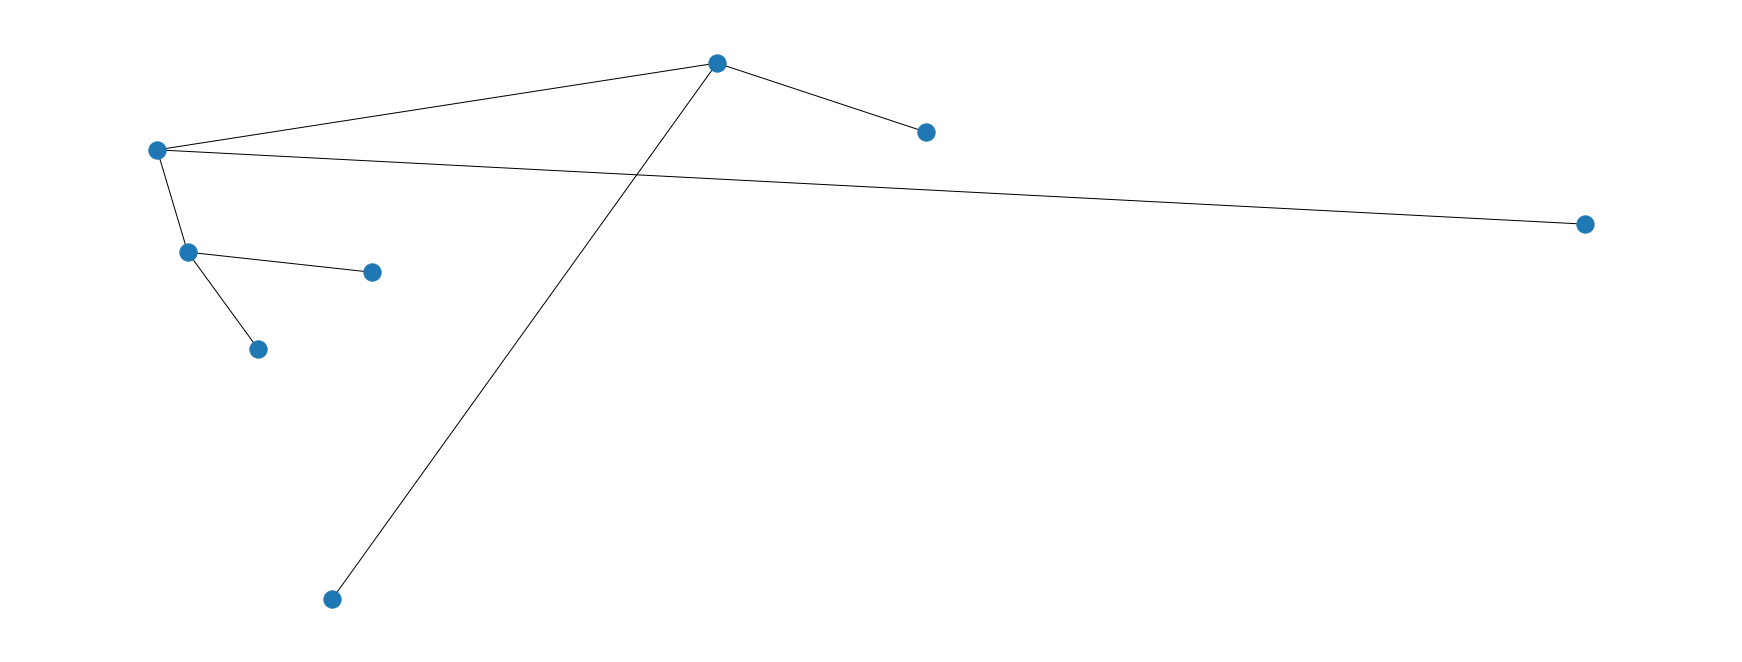

In [27]:
import networkx as nx


def distance_matrix2graph(distance_matrix):
    graph = nx.Graph()
    for i in range(distance_matrix.shape[0]):
        for j in range(distance_matrix.shape[0]):
            if i < j:
                graph.add_edge(i, j, weight=distance_matrix[i][j])
    return graph


def nb_joining(graph: nx.Graph):
    r = []
    for idx, node in enumerate(graph.nodes()):
        edges = list(graph.edges(node, data="weight"))
        r.append(sum([edge[2] for edge in edges]))
    #for i in range()
    min_i = r.index(min(r))
    pass
print(distance_matrix)
graph = distance_matrix2graph(distance_matrix)
nb_joining(graph)
def nb_joining(distance_m, graph=None, remaining_node_ids=None):
    """
    """
    if graph is None:
        graph = distance_matrix2graph(distance_m)
    n = len(distance_m)
    if n == 2:
        #print d_mat
        return distance_m
    if remaining_node_ids is None:
        remaining_node_ids = list(range(len(list(graph.nodes()))))
    m_len = distance_m.shape[0]
    # compute the distance from each node to the rest of the nodes
    divergence = np.array([np.sum(distance_m, axis=1)])
    # Compute the Q matrix
    q_matrix = (n-2) * distance_m - divergence - divergence.T
    np.fill_diagonal(q_matrix, 0)
    #print(q_matrix)
    # compute the indices of the lowest value.
    # argmin flattens the arrays before computing the minimun, unravel_index 
    # returns the indeces from the unflatten array
    minimum_q = np.unravel_index(np.argmin(q_matrix), np.shape(q_matrix))
    #print lw
    # Distance from the pair members to the new node
    d_ij = (1/2) * ( distance_m[minimum_q] + (( np.sum(distance_m[minimum_q[0]]) - np.sum(distance_m[minimum_q[1]]) ) / (n-2)) ) 
    d_ji = distance_m[minimum_q] - d_ij
    print(distance_m, d_ij, d_ji)
    #print(d_ij, d_ji, minimum_q)
    # Compute a new distance-matrix using the new node
    new_node_d = 0.5 * (distance_m[minimum_q[0]] + distance_m[minimum_q[1]] - distance_m[minimum_q])
    new_node_d[minimum_q[0]] = d_ij
    new_node_d[minimum_q[1]] = d_ji
    print(new_node_d)
    #print(distance_m)
    distance_m = np.delete(distance_m, minimum_q, axis=0)
    #print(distance_m)
    distance_m = np.delete(distance_m, minimum_q, axis=1)
    #print(distance_m, new_node_d.shape)
    # delete edges connected to nodes of minimum_q
    to_delete=[]
    new_node_id = len(list(graph.nodes()))
    
    for node in minimum_q:
        edges = list(graph.edges(remaining_node_ids[node]))
        for edge in edges:
            if edge[1] in remaining_node_ids:
                print("delete", edges)
                graph.remove_edges_from([edge])
    
    for i in range(new_node_d.shape[0]):
        if i not in minimum_q:
            dist = new_node_d[i]
            graph.add_edge(remaining_node_ids[i], new_node_id, weight=dist)
            print(remaining_node_ids[i], new_node_id)
    # add new edges from new_node_d to all nodes
    print(remaining_node_ids[minimum_q[0]], new_node_id)
    print(remaining_node_ids[minimum_q[1]], new_node_id)
    graph.add_edge(remaining_node_ids[minimum_q[0]], new_node_id, weight=d_ij)
    graph.add_edge(remaining_node_ids[minimum_q[1]], new_node_id, weight=d_ji)
    print("graph", len(graph.nodes()))
    new_d_mat = np.zeros((n-1, n-1))
    new_d_mat[-1] = new_node_d[1:]
    new_d_mat[:,-1] = new_node_d[1:]
    new_d_mat[:-1,:-1] = distance_m
    print(new_d_mat)
    print("================================")
    print(remaining_node_ids, minimum_q)
    new_ids = [node_id for idx, node_id in enumerate(remaining_node_ids) if idx not in minimum_q]
    new_ids.append(new_node_id)
    print(new_ids)
    print()
    nb_joining(new_d_mat, graph, new_ids)
    return graph

graph = nb_joining(distance_matrix)
nx.draw(graph)

print(graph.edges(data="weight"))